In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the experimental dataset (with "Class" column)
df_exp = pd.read_csv('../data/creditcard.csv')
print("Dataset shape:", df_exp.shape)

# Drop duplicates
df_exp = df_exp.drop_duplicates()
print("Dataset shape:", df_exp.shape)

# Normalize the "Amount" column
scaler = StandardScaler()
df_exp["Normalized_Amount"] = scaler.fit_transform(df_exp["Amount"].values.reshape(-1, 1))
# Optionally, drop the original "Amount" column
df_exp = df_exp.drop(["Amount"], axis=1)
print("Dataset shape:", df_exp.shape)

# Fetch the target feature ("Class") and independent features
Y_exp = df_exp["Class"]
X_exp = df_exp.drop(["Class"], axis=1)

# Handle class imbalance using SMOTE (if applicable)
X_res, Y_res = SMOTE(random_state=42).fit_resample(X_exp, Y_exp)

# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train_exp, X_test_exp, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=1/3, random_state=42, stratify=Y_res)

# Define the SVM classifier with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Define a grid of hyperparameters to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1]
}

# Use GridSearchCV to find the best hyperparameters with 5-fold cross-validation
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_exp, Y_train)

print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to predict on the test set
best_svm = grid_search.best_estimator_
Y_pred = best_svm.predict(X_test_exp)

# Evaluate the SVM model with the best parameters
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Optimized SVM (RBF) Evaluation Metrics:")
print("Accuracy: {:.5f}".format(accuracy))
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1-score: {:.5f}".format(f1))

Dataset shape: (66240, 31)
Dataset shape: (65980, 31)
Dataset shape: (65980, 31)
Best Parameters: {'C': 10, 'gamma': 0.001}
Optimized SVM (RBF) Evaluation Metrics:
Accuracy: 0.99453
Precision: 0.99611
Recall: 0.99293
F1-score: 0.99452


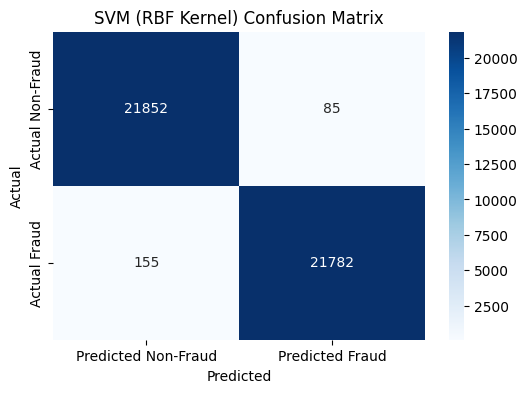

In [13]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'], 
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM (RBF Kernel) Confusion Matrix')
plt.show()